<div style="text-align:center;">
    <h1 style="font-weight:bold;; font-size: 40px;">Analyzing a healthcare dataset</h1>
</div>

This project involves analyzing a healthcare dataset. The dataset includes various features related to patients' health and lifestyle, including age, sex, general health, checkup frequency, exercise habits, smoking history, and the presence of various diseases. Each entry represents a unique patient, and the features capture various factors associated with disease prognosis. The main goal is finding relationships between heart disease and features.

![Dataset Cover](https://storage.googleapis.com/kaggle-datasets-images/3475382/6071860/d53d922c4e1696a9bfecffbc841d29ec/dataset-cover.jpg?t=2023-07-03-11-33-52)

In [2]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
from IPython.core.display import HTML

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset'

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./cardiovascular-diseases-risk-prediction-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
data_dir = './cardiovascular-diseases-risk-prediction-dataset'

In [6]:
import os
os.listdir(data_dir)

['CVD_cleaned.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "Cardiovascular Diseases Risk Prediction"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

<IPython.core.display.Javascript object>

In [52]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ziba-delavari/cardiovascular-diseases-risk-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction


'https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction'

## Data Preparation and Cleaning

- The data is already pretty clean, so it is not needed to use imuter function or drop NON values.




In [11]:
import pandas as pd
import numpy as np

In [12]:
cardio_data=pd.read_csv("cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv")

In [13]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

**Checking how many null value is exist**

In [14]:
cardio_data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

- **Nominal categories are encoded using the OneHotEncoding method, while ordinal categories are encoded using the binary encoding method.**

In [15]:
object_columns = cardio_data.select_dtypes('object').columns.to_list()
object_columns

['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History']

In [16]:
cardio_data_object = cardio_data.select_dtypes('object')

In [17]:
cardio_data_object = pd.get_dummies(cardio_data_object, prefix=["Checkup", "General_Health", "Age_Category"], columns=["Checkup", "General_Health", "Age_Category"], drop_first=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
labelencoder=LabelEncoder()
object_columns.remove("General_Health")
object_columns.remove("Age_Category")
object_columns.remove("Checkup")

In [20]:
for column in object_columns:
  cardio_data_object[column] = labelencoder.fit_transform(cardio_data_object[column])

## Scaling

- scaling numerical values can have a significant effect on data visualization. Visualization techniques often rely on the relationships and patterns within the data, and the scale of numerical features can impact how these patterns are displayed and interpreted.

- If the numerical features have different scales, the data points from one feature might overwhelm or overshadow the data points from another feature. Scaling the features can help bring them to a similar range, making it easier to visualize and compare different variables.

In [21]:
cardio_data_numerical = cardio_data.select_dtypes('float64')

In [22]:
numeric_cols = cardio_data.select_dtypes('float64').columns.to_list()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit(cardio_data_numerical[numeric_cols])

MinMaxScaler()

In [60]:
cardio_data_numerical[numeric_cols] = scaler.transform(cardio_data_numerical[numeric_cols])

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [26]:
cardio_data_numerical.head(1)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.393333,0.028761,0.028863,0.0,0.25,0.125,0.09375


- **Cancating two Numerical and object Dataframes**

In [27]:
cardio_df = pd.concat([cardio_data_object , cardio_data_numerical], axis=1)

In [28]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Exercise                         308854 non-null  int64  
 1   Heart_Disease                    308854 non-null  int64  
 2   Skin_Cancer                      308854 non-null  int64  
 3   Other_Cancer                     308854 non-null  int64  
 4   Depression                       308854 non-null  int64  
 5   Diabetes                         308854 non-null  int64  
 6   Arthritis                        308854 non-null  int64  
 7   Sex                              308854 non-null  int64  
 8   Smoking_History                  308854 non-null  int64  
 9   Checkup_Never                    308854 non-null  uint8  
 10  Checkup_Within the past 2 years  308854 non-null  uint8  
 11  Checkup_Within the past 5 years  308854 non-null  uint8  
 12  Ch

In [29]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ziba-delavari/cardiovascular-diseases-risk-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction


'https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction'

## Exploratory Analysis and Visualization

- Exploratory Data Analysis (EDA) is a crucial technique that allows us to gain deeper insights and a comprehensive understanding of the data. Effective visualization of data through graphs necessitates appropriate encoding of columns with object values. Nominal categories are encoded using the OneHotEncoding method, while ordinal categories are encoded using the binary encoding method.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [32]:
cardio_data["Checkup"].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [33]:
cardio_data["General_Health"].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [34]:
cardio_data["Age_Category"].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

- Based on the heatmap below, it is evident that certain lifestyle factors significantly impact the risk of heart disease. Smoking and lack of exercise are identified as major risk factors, leading to an increased susceptibility to heart disease. Additionally, the data suggests that men are more vulnerable to heart disease compared to women.

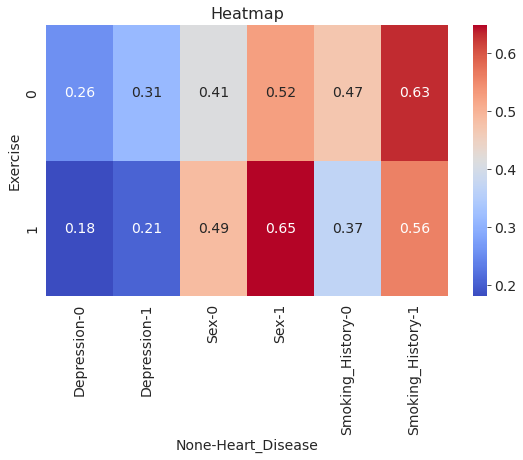

In [35]:
heatmap_data = cardio_data_object.pivot_table(index='Exercise', columns='Heart_Disease', values=['Smoking_History', 'Sex', 'Depression'])
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title("Heatmap", fontsize=16)
plt.show()

**According to the below Distributio charts:**

**BMI**: The distribution of Body Mass Index (BMI) is moderately right-skewed, indicating that a substantial number of patients fall within the normal to overweight range (BMI 20-30). However, there is a notable presence of patients in the obese range (BMI > 30).

🍺 Alcohol_Consumption: The feature "Alcohol_Consumption" exhibits a heavily right-skewed distribution, implying that the majority of patients have low alcohol consumption. However, a few patients report high alcohol consumption.

🍎 Fruit_Consumption: Similarly, the "Fruit_Consumption" feature also displays a right-skewed distribution. Many patients report regular fruit consumption, but a significant number of patients consume fruits less frequently.

🥦 Green_Vegetables_Consumption: The feature "Green_Vegetables_Consumption" follows a more balanced, or normally distributed, pattern. Most patients report moderate consumption of green vegetables.

**Weight_(kg)**: The distribution of patient weights appears to be approximately normal, with the majority falling within the range of approximately 60 to 100 kg.

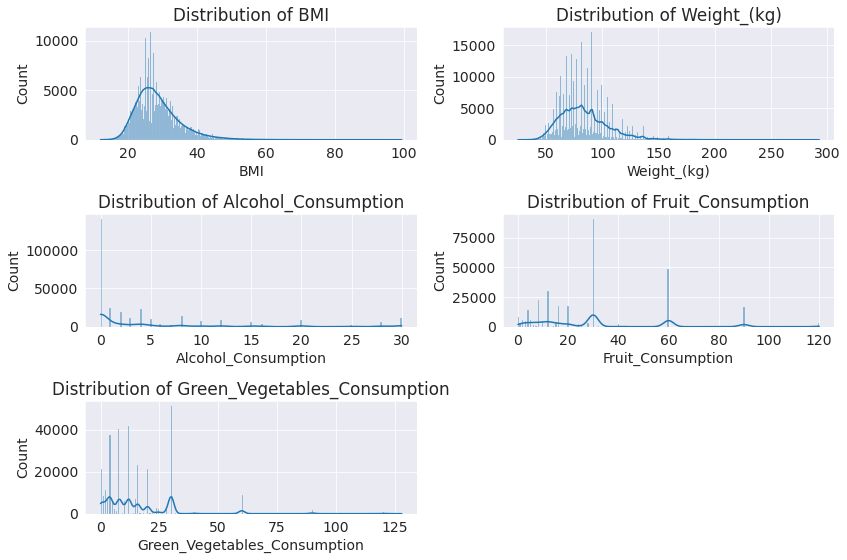

In [36]:
Features = ["BMI", "Weight_(kg)", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption"]

# Calculate the number of subplot columns based on the number of features
num_features = len(Features)
num_cols = min(num_features, 2)  # Set to 2 columns if there are fewer than 2 features

# Calculate the number of subplot rows
num_rows = (num_features + num_cols - 1) // num_cols

# Create the subplot grid
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Flatten the axs array if it's 2D to handle both cases (1 row and multiple rows)
if num_rows > 1:
    axs = axs.flatten()

# Loop through the features and plot each one in a separate subplot
for i, feature in enumerate(Features):
    sns.histplot(data=cardio_data, x=feature, kde=True, ax=axs[i])
    axs[i].set_title('Distribution of ' + feature)
# Hide the empty subplot in the last row and column if it exists
if num_features % num_cols != 0:
    axs[-1].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()

- Based on the data analysis, a significant number of patients rate their general health as "Good." Interestingly, this group of patients has a higher prevalence of heart disease compared to those who described their health as "Poor" or "Fair."

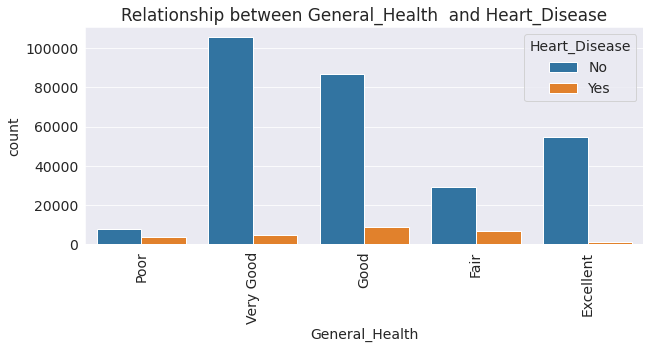

In [37]:
plt.figure(figsize=(10, 4))
sns.countplot(data=cardio_data, x='General_Health', hue='Heart_Disease')
plt.title('Relationship between General_Health  and Heart_Disease')
plt.xticks(rotation=90)
plt.show()

- more patients with heart disease reported they do exercise regularly, more than others who do not.

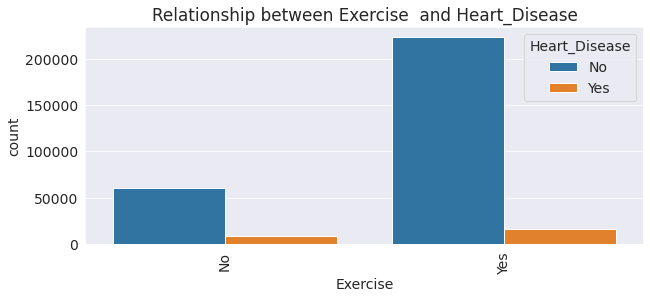

In [38]:
plt.figure(figsize=(10, 4))
sns.countplot(data=cardio_data, x='Exercise', hue='Heart_Disease')
plt.title('Relationship between Exercise  and Heart_Disease')
plt.xticks(rotation=90)
plt.show()

- People aged above 50 are experiencing a higher incidence of heart disease.

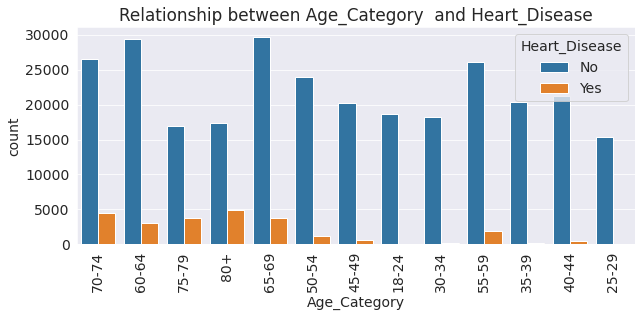

In [39]:
plt.figure(figsize=(10, 4))
sns.countplot(data=cardio_data, x='Age_Category', hue='Heart_Disease')
plt.title('Relationship between Age_Category  and Heart_Disease')
plt.xticks(rotation=90)
plt.show()

- Men are more vulnerable about heart disease more that women.

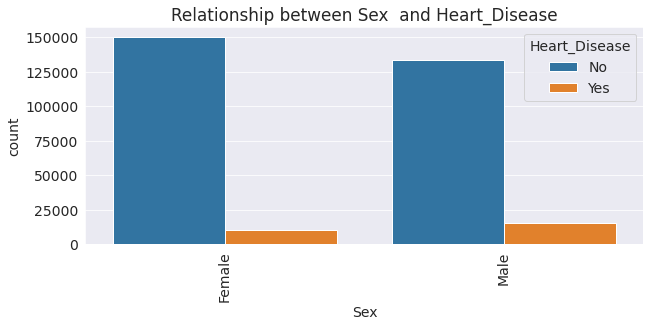

In [40]:
plt.figure(figsize=(10, 4))
sns.countplot(data=cardio_data, x='Sex', hue='Heart_Disease')
plt.title('Relationship between Sex  and Heart_Disease')
plt.xticks(rotation=90)
plt.show()

- The majority of patients do not have a history of smoking.

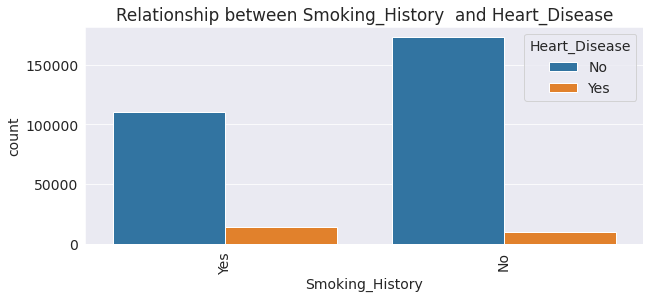

In [41]:
plt.figure(figsize=(10, 4))
sns.countplot(data=cardio_data, x='Smoking_History', hue='Heart_Disease')
plt.title('Relationship between Smoking_History  and Heart_Disease')
plt.xticks(rotation=90)
plt.show()

- A higher number of patients with diabetes are experiencing heart disease.

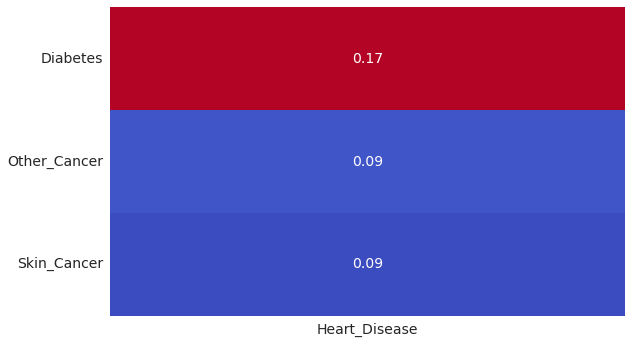

In [42]:
disease_variables = cardio_df[['Heart_Disease','Skin_Cancer', 'Other_Cancer', 'Diabetes']]
corr = disease_variables.corr()
target_corr = corr['Heart_Disease'].drop('Heart_Disease')
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.tight_layout()
plt.show()

Let us save and upload our work to Jovian before continuing

In [43]:
import jovian

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ziba-delavari/cardiovascular-diseases-risk-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction


'https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction'

## Asking and Answering Questions





#### Q1: What percentage of respondents with 'Very Good' general health have visited a doctor for a routine checkup within the past year?

In [45]:
vc = cardio_data[(cardio_data["General_Health"] == 'Very Good') & (cardio_data["Checkup"] == 'Within the past year')]
vc.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0


In [46]:
perc = vc.shape[0] *100 / cardio_data.shape[0]

In [47]:
print(f"percentage of respondents with 'Very Good' general health have visited a doctor for a routine checkup within the past year is: {perc:.2f}")

percentage of respondents with 'Very Good' general health have visited a doctor for a routine checkup within the past year is: 27.34


#### Q2: Among individuals who have been diagnosed with cancer (skin or other types), what is the average age for both males and females?

In [48]:
cardio_data.head(1)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0


In [49]:
disease=cardio_data[(cardio_data["Skin_Cancer"] =="Yes") & (cardio_data["Other_Cancer"] =="Yes")]

In [50]:
disease["Age_Category"].unique()

array(['70-74', '80+', '75-79', '60-64', '65-69', '50-54', '55-59',
       '40-44', '35-39', '25-29', '45-49', '18-24', '30-34'], dtype=object)

In [55]:
# Step 1: Create a dictionary to map age categories to midpoints
age_midpoints = {
    '70-74': 72,
    '80+': 80,
    '75-79': 77,
    '60-64': 62,
    '65-69': 67,
    '50-54': 52,
    '55-59': 57,
    '40-44': 42,
    '35-39': 37,
    '25-29': 27,
    '45-49': 47,
    '18-24': 21,
    '30-34': 32
}

# Step 2: Map the age_category column to their midpoints
disease.loc[:, 'age_midpoint'] = disease['Age_Category'].map(age_midpoints)

# Step 3: Calculate the average age
average_age =disease['age_midpoint'].mean()

print("Average age:", average_age)

Average age: 71.59492764006305


#### Q3: Among those with skin cancer or other cancer, what is the average BMI compared to respondents who do not have cancer?

In [52]:
average_bmi =disease['BMI'].mean()

In [53]:
print(f"Avarage BMI among people who have cancer is:{average_bmi:.2f}")

Avarage BMI among people who have cancer is:27.95


- **The results indicate that a majority of individuals with cancer are overweight.**

#### Q4: Does the frequency of alcohol consumption vary significantly based on the age category of the respondents?

In [54]:
cardio_data["Alcohol_Consumption"].unique()

array([ 0.,  4.,  3.,  8., 30.,  2., 12.,  1.,  5., 10., 20., 17., 16.,
        6., 25., 28., 15.,  7.,  9., 24., 11., 29., 27., 14., 21., 23.,
       18., 26., 22., 13., 19.])

In [55]:
cardio_data["Age_Category"].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

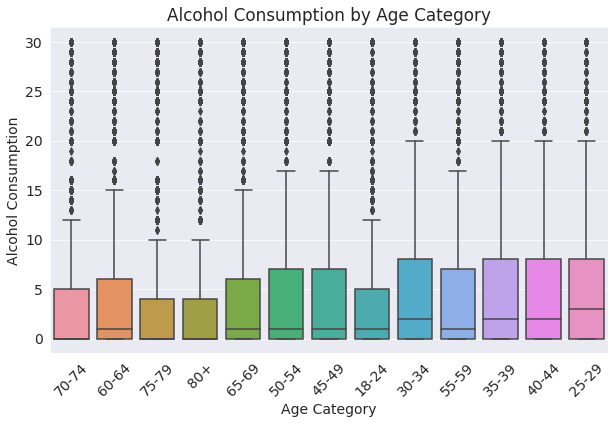

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age_Category", y="Alcohol_Consumption", data=cardio_data)
plt.xlabel("Age Category")
plt.ylabel('Alcohol Consumption')
plt.title('Alcohol Consumption by Age Category')
plt.xticks(rotation=45)
plt.show()

- **The results indicate that alcohol consumption is higher among young adults aged 25 to 50 compared to other age groups.**

#### Q5: Among respondents who reported having diabetes, what percentage also reported a history of depression?

In [63]:
cardio_data.drop(cardio_data[cardio_data['Diabetes'] == 'No'].index , inplace=True)

In [68]:
depression=cardio_data[cardio_data['Depression'] =='Yes']

In [72]:
x , y =depression.shape[0] , cardio_data.shape[0]

In [74]:
print(f"Percentage of respondents who reported having diabetes and history of depression is: {(x / y)*100:.2f}")

Percentage of respondents who reported having diabetes and history of depression is: 24.92


In [75]:
import jovian

In [76]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ziba-delavari/cardiovascular-diseases-risk-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction


'https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction'

## Inferences and Conclusion

it is evident that certain lifestyle factors significantly impact the risk of heart disease. Smoking and lack of exercise are identified as major risk factors, leading to an increased susceptibility to heart disease. Additionally, the data suggests that men are more vulnerable to heart disease compared to women.

The findings from the heatmap emphasize the importance of adopting a healthy lifestyle to reduce the risk of heart disease. Quitting smoking and incorporating regular physical activity into one's routine can be crucial steps in preventing heart-related issues. Moreover, healthcare professionals should pay particular attention to men, as they may require targeted interventions and monitoring to address their higher vulnerability to heart disease.

It is essential to promote awareness about the significance of a healthy lifestyle and encourage both men and women to take proactive measures in safeguarding their heart health. By making positive changes in their daily habits, individuals can significantly reduce their risk of heart disease and enjoy a better quality of life.

In [64]:
import jovian

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ziba-delavari/cardiovascular-diseases-risk-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction


'https://jovian.com/ziba-delavari/cardiovascular-diseases-risk-prediction'

## References and Future Work
- The link of dataset: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
- pandas: https://pandas.pydata.org/docs/user_guide/index.html#user-guide
- matplotlib : https://matplotlib.org/stable/plot_types/index.html
- seaborn: https://seaborn.pydata.org/tutorial.html

**Future Work**

Maintaining a healthy lifestyle, characterized by no smoking, regular exercise, and abstaining from alcohol consumption, can significantly reduce the risk of developing diabetes. However, it's important to note that the dataset lacks crucial information regarding family history and genetic factors, which are also essential in understanding diabetes risk comprehensively. so, Collecting this type of information about patients is essential for conducting a comprehensive analysis.
- colecting and analyzing family history diseases.
- colecting and analyzing genetic factors for finding the relationsip between genetic factors and diseases.

In [6]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ziba-delavari/cardiovascular-diseases-risk-prediction" on https://jovian.com
